# Importing Important Libararies

In [113]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [114]:
df=pd.read_csv('survey.csv')
df.head(15)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


# Peeking through data for insights

In [115]:
#looking for missing or nan values
df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [116]:
print(df.duplicated().sum())

0


In [117]:
df.shape

(1259, 27)

In [118]:
col_list=df.columns.tolist()

In [119]:
for col in col_list:
    print(df[col].unique())
    print(f"{col} done next one below \n\n\n")

['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']
Timestamp done next one below 



[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
Age done next one below 



['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male 

In [120]:
def clean_gender(col):
    col=str(col).strip().lower()

    male= {
        'm', 'male', 'man', 'cis male', 'cis man', 'male ', 'male (cis)',
        'mail', 'msle', 'mal', 'malr', 'maile', 'make',
        'guy (-ish) ^_^', 'ostensibly male, unsure what that really means'
    }

    female={
        'f', 'female', 'woman', 'female ', 'cis female', 'cis-female/femme',
        'female (cis)', 'femake', 'femail', 'cis woman'
    }

    trans= {
        'trans-female', 'trans woman', 'female (trans)'
    }
    
    nonbinary={
        'non-binary', 'genderqueer', 'fluid', 'enby', 'androgyne', 'agender',
        'male leaning androgynous', 'something kinda male?', 'queer/she/they'
    }

    if col in male:
        return 'Male'
    elif col in female:
        return 'Female'
    elif col in trans:
        return 'Transgender'
    elif col in nonbinary:
        return 'Non Binary'
    else:
        return 'Others'
    
df['Gender']=df['Gender'].apply(clean_gender)

In [121]:
print(df['Gender'].value_counts())


Gender
Male           992
Female         247
Non Binary       9
Others           7
Transgender      4
Name: count, dtype: int64


In [122]:
df['Age'].unique() 
# df['Age'].value_counts(dropna=False)  


array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [123]:
df.loc[(df['Age'] < 0) | (df['Age'] > 75), 'Age'] = np.nan
df['Age'] = df['Age'].fillna(df['Age'].median())



In [124]:
df['Age'].isnull().sum()

print(df['Age'].unique())

[37. 44. 32. 31. 33. 35. 39. 42. 23. 29. 36. 27. 46. 41. 34. 30. 40. 38.
 50. 24. 18. 28. 26. 22. 19. 25. 45. 21. 43. 56. 60. 54. 55. 48. 20. 57.
 58. 47. 62. 51. 65. 49.  5. 53. 61.  8. 11. 72.]


In [125]:
df['state'].value_counts().head()

state
CA    138
WA     70
NY     57
TN     45
TX     44
Name: count, dtype: int64

In [126]:
df['state'] = df['state'].fillna('CA')
print(df['state'].isnull().sum())


0


In [127]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                           0
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [128]:
print(df['self_employed'].value_counts())
df['self_employed'].isna().sum()

self_employed
No     1095
Yes     146
Name: count, dtype: int64


np.int64(18)

In [129]:
df['self_employed']=df['self_employed'].fillna('Unknown')

In [130]:
df['self_employed'].value_counts()

self_employed
No         1095
Yes         146
Unknown      18
Name: count, dtype: int64

In [131]:
print(df['work_interfere'].value_counts())
df['work_interfere'].isna().sum()

work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64


np.int64(264)

In [132]:
df['work_interfere']=df['work_interfere'].fillna('Sometimes')

In [133]:
df=df.drop(columns=["comments","Timestamp"])

In [134]:
features_clean=df.columns.tolist()

<function matplotlib.pyplot.show(close=None, block=None)>

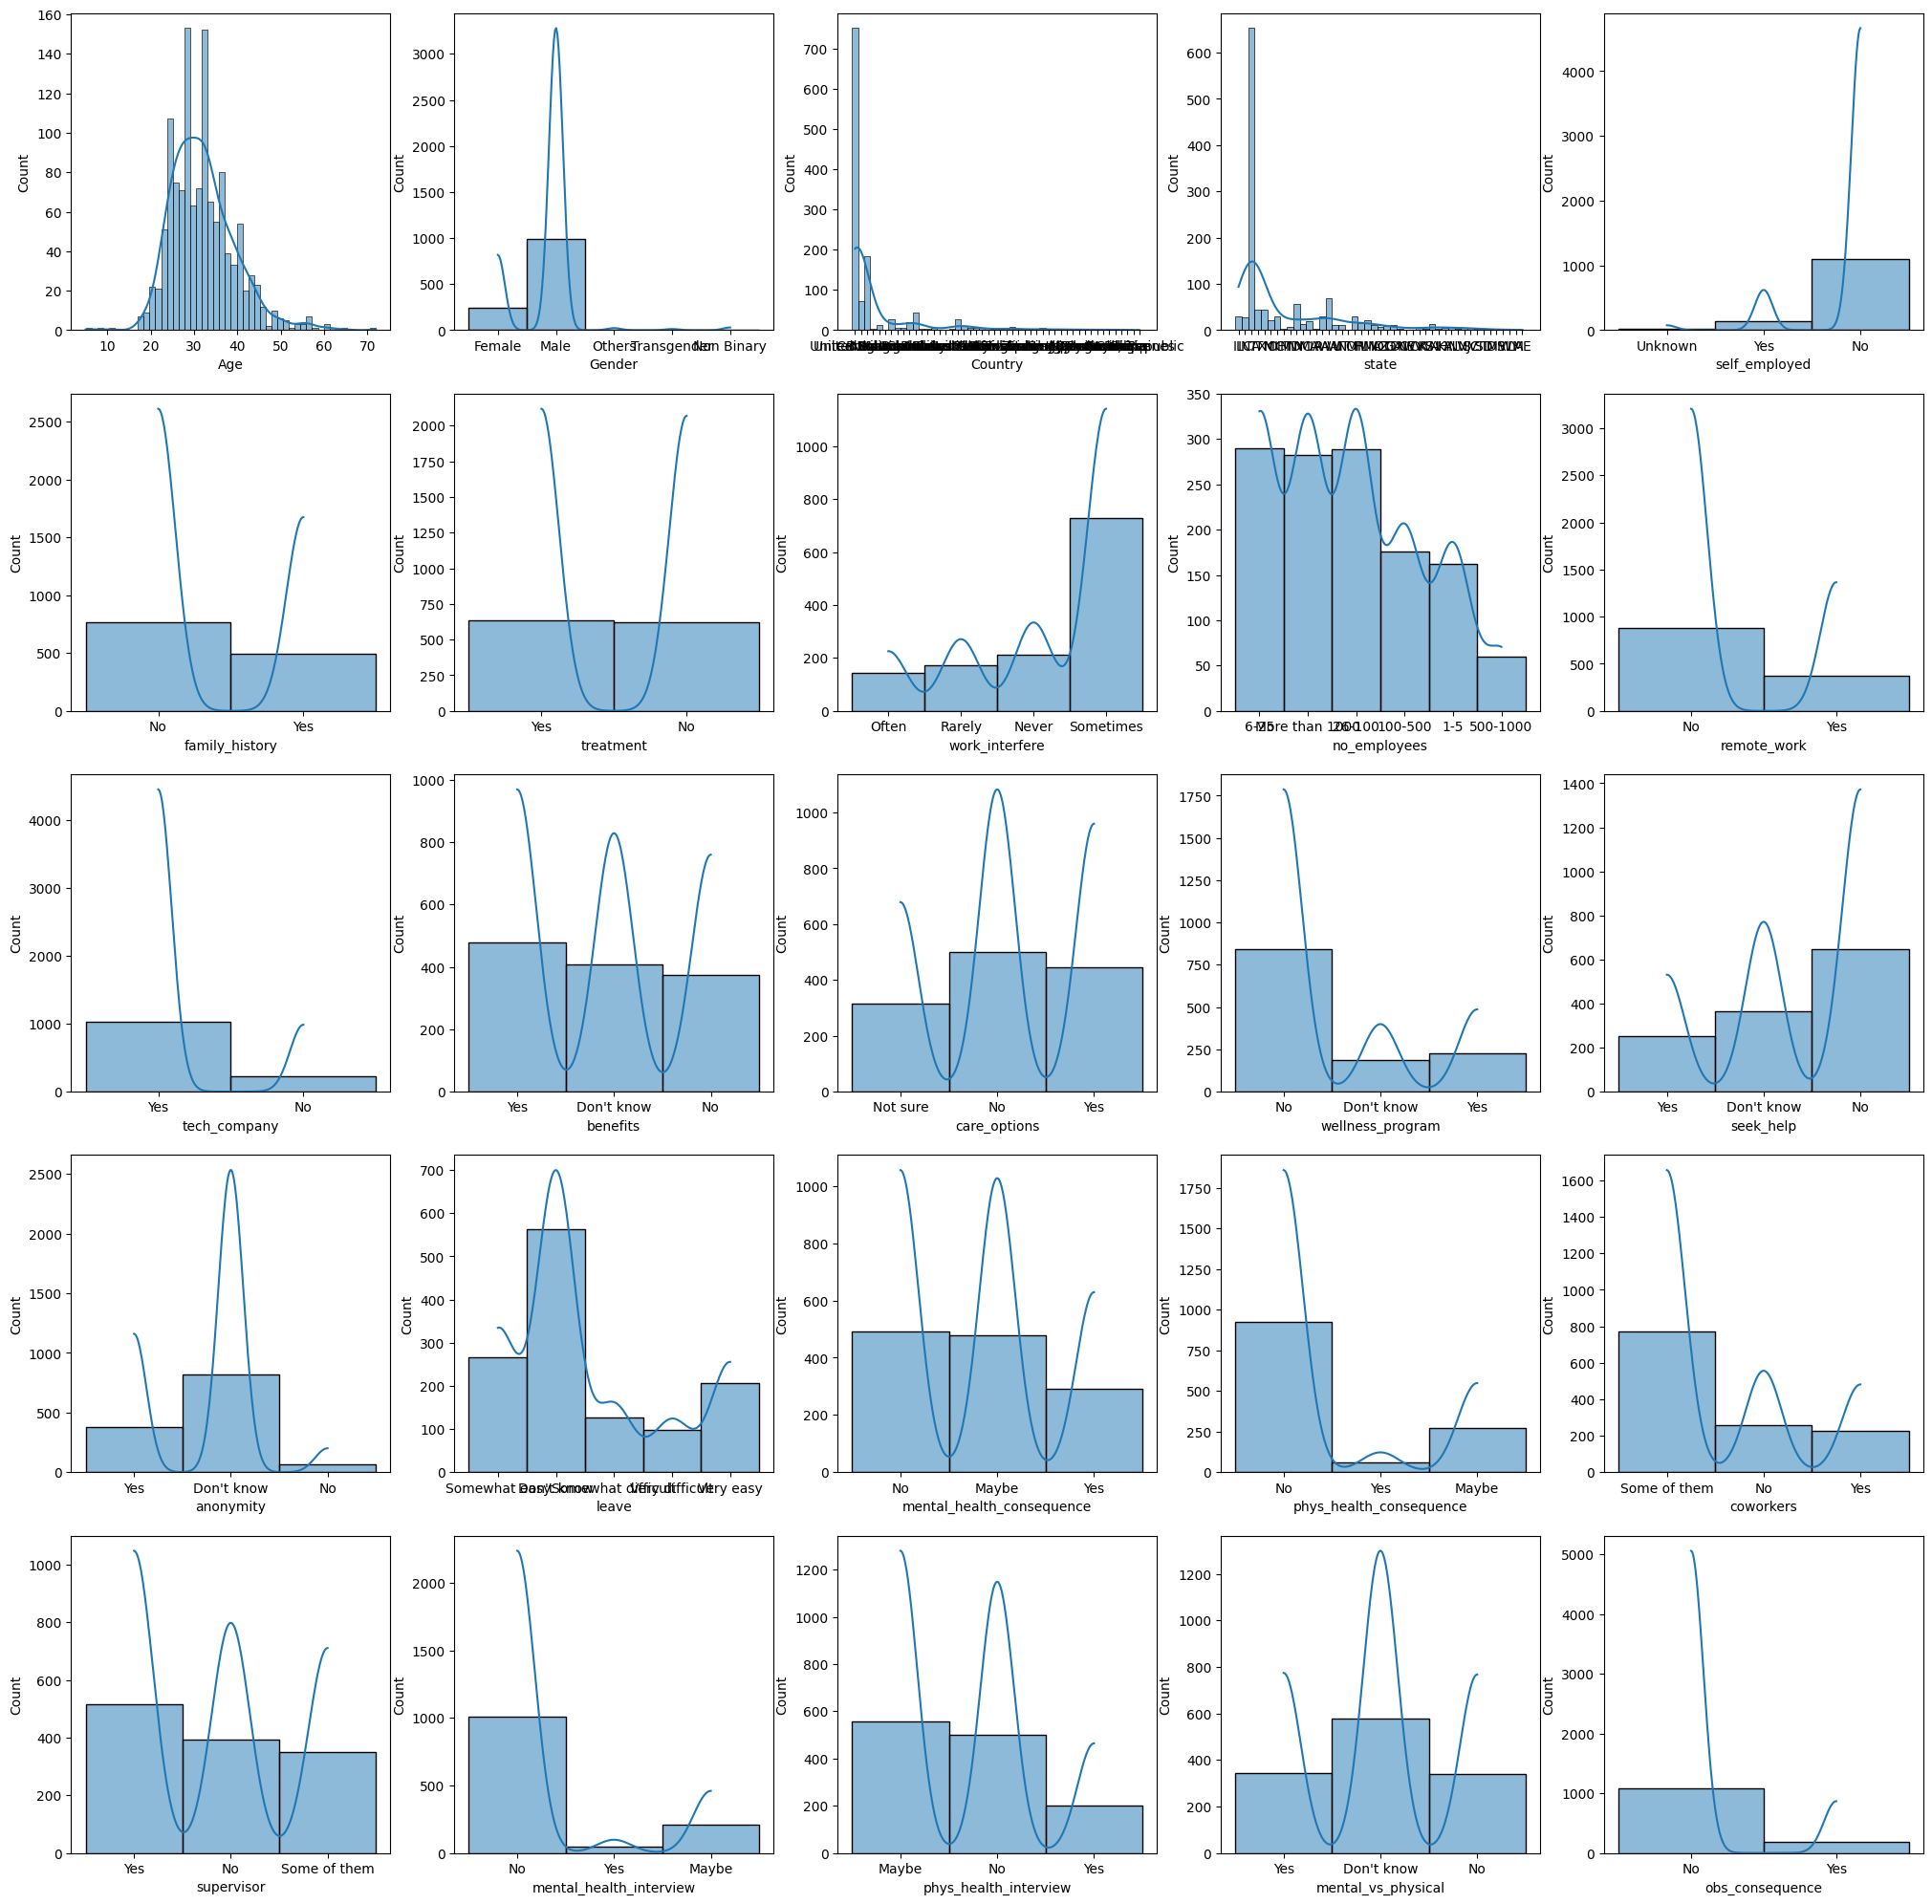

In [135]:
fig, axes = plt.subplots(5, 5,figsize=(25,25))
axes = axes.flatten()
for i,feature in enumerate(features_clean):
    sns.histplot(df[feature], bins=50, kde=True, ax=axes[i])
plt.show

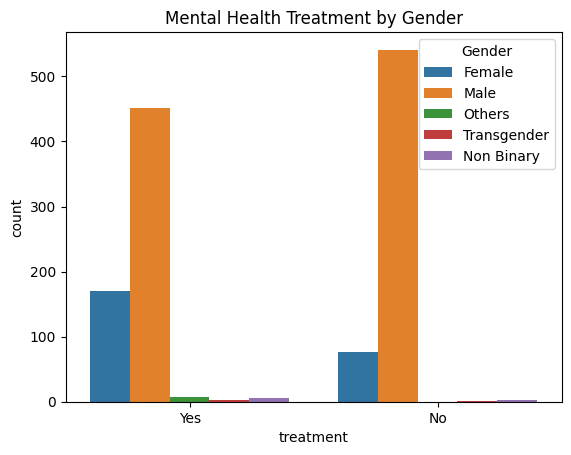

In [136]:
sns.countplot(data=df, x='treatment', hue='Gender')
plt.title('Mental Health Treatment by Gender')
plt.show()


In [137]:
X=df.drop(columns=['treatment'])
y=df['treatment']

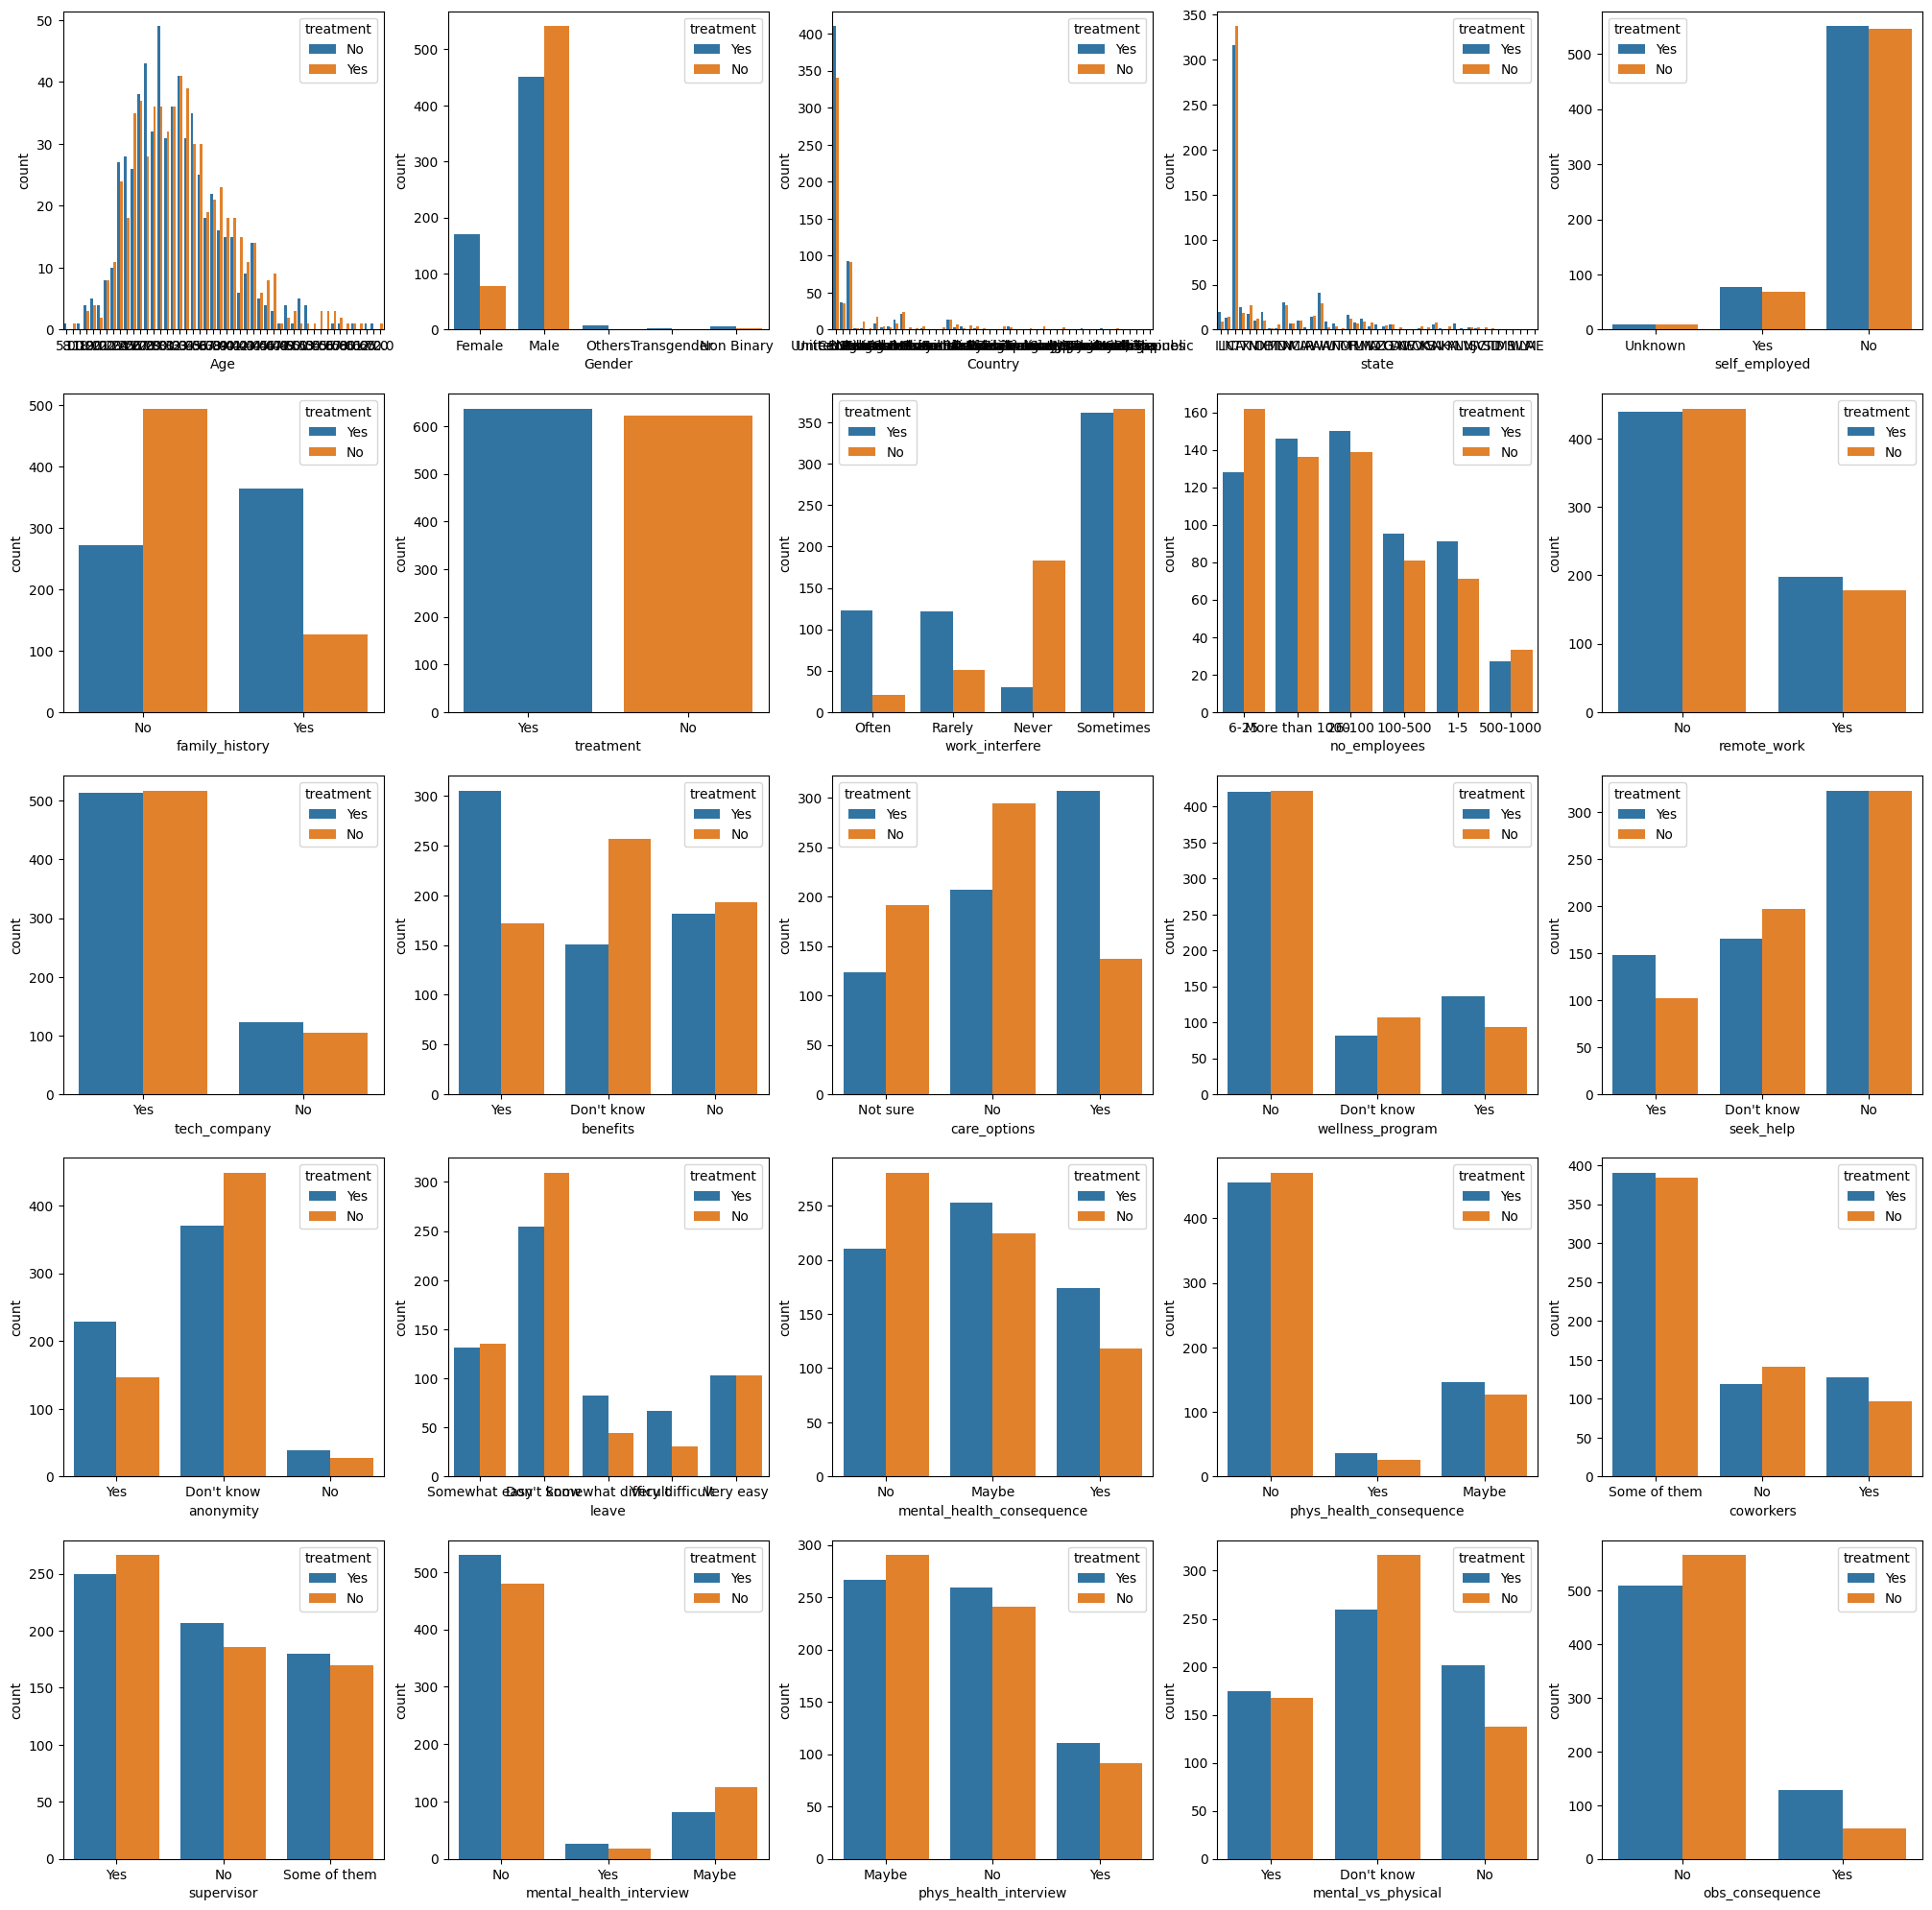

In [138]:
fig, axes = plt.subplots(5, 5,figsize=(25,25))
axes = axes.flatten()
for i,feature in enumerate(features_clean):
    sns.countplot(data=df, x=feature, hue='treatment', ax=axes[i])
plt.show()

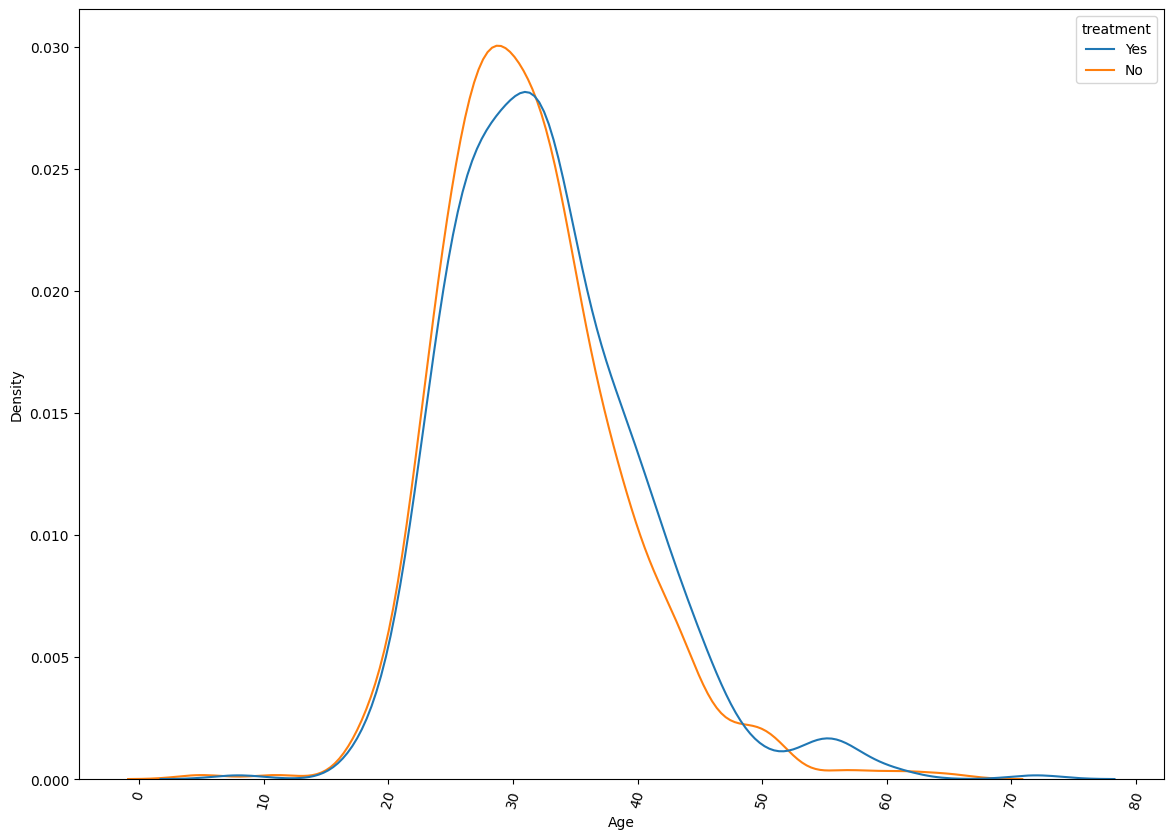

In [139]:
plt.figure(figsize=(14,10))
sns.kdeplot(data=df, x='Age', hue='treatment')
plt.xticks(rotation=75)
plt.show()

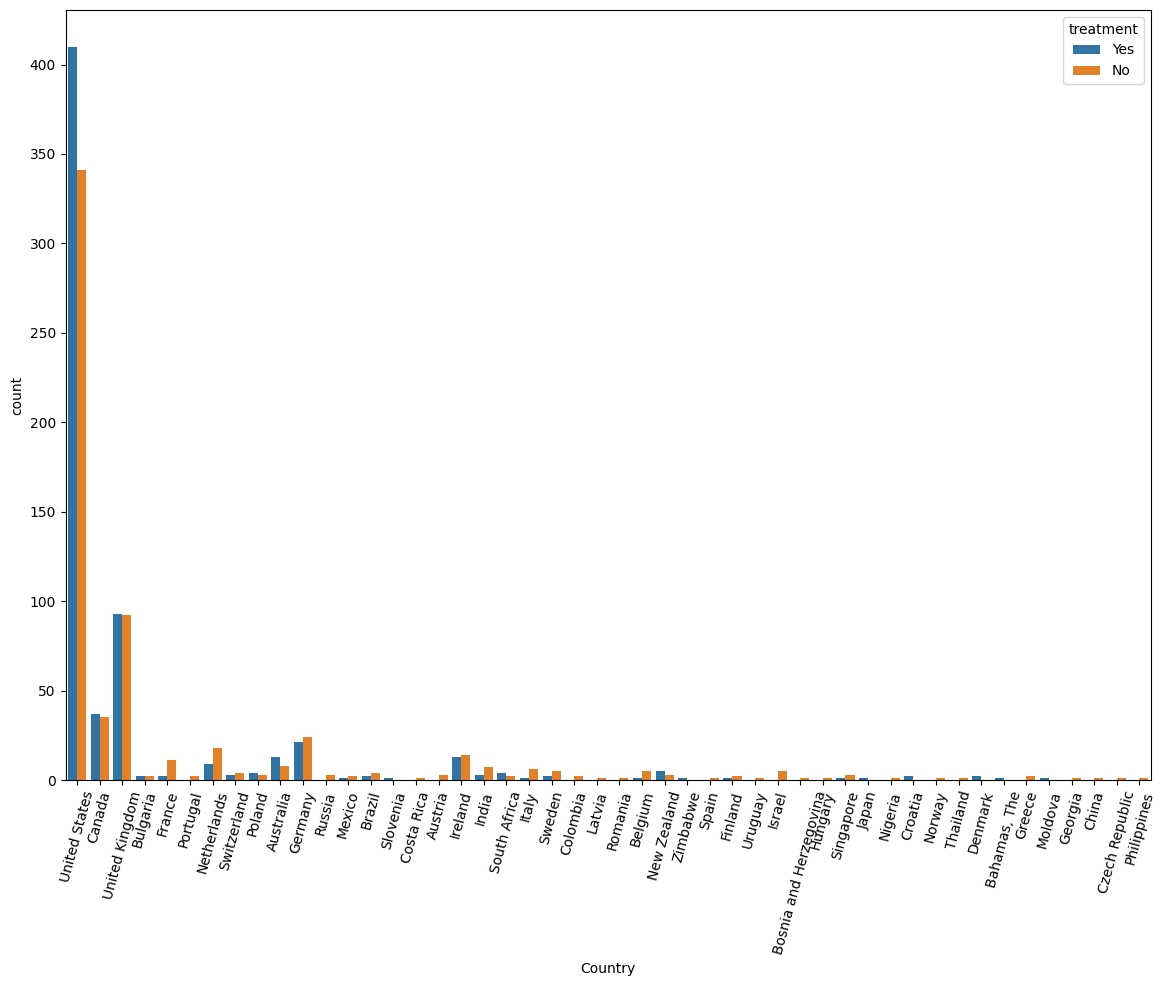

In [140]:
plt.figure(figsize=(14,10))
sns.countplot(data=df, x='Country', hue='treatment')
plt.xticks(rotation=75)
plt.show()

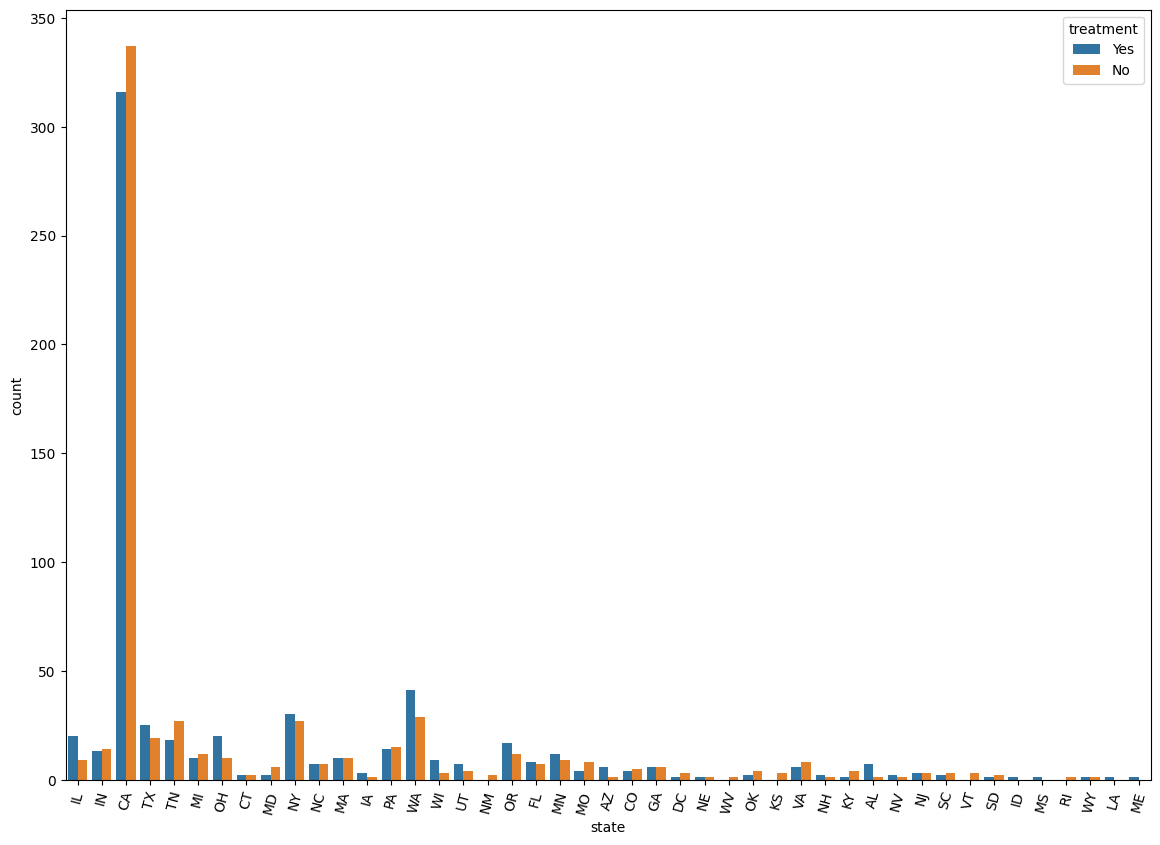

In [141]:
plt.figure(figsize=(14,10))
sns.countplot(data=df, x='state', hue='treatment')
plt.xticks(rotation=75)
plt.show()

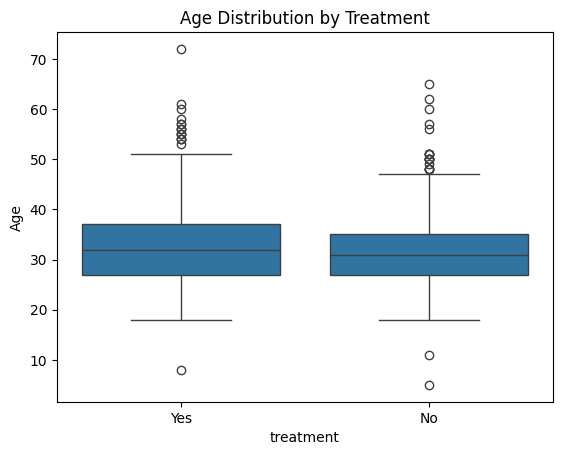

In [142]:
sns.boxplot(data=df, x='treatment', y='Age')
plt.title('Age Distribution by Treatment')
plt.show()


In [143]:
df.to_csv('cleaned_dataset.csv', index=False)

In [144]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
low_frequncy_list=['Gender', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']
for l in low_frequncy_list:
    df[l]=le.fit_transform(df[l])

In [145]:
low_frequncy_list.append('Age')
df_corr=df[low_frequncy_list]
df_corr

,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age
0,0,1,0,1,1,4,0,1,2,1,...,2,1,1,1,2,1,0,2,0,37.0
1,1,1,0,0,2,5,0,0,0,0,...,0,0,1,0,0,1,1,0,0,44.0
2,1,1,0,0,2,4,0,1,1,0,...,1,1,1,2,2,2,2,1,0,32.0
3,1,1,1,1,1,2,0,1,1,2,...,1,2,2,1,0,0,0,1,1,31.0
4,1,1,0,0,0,1,1,1,2,0,...,0,1,1,1,2,2,2,0,0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1,0,0,1,3,2,0,1,1,0,...,2,1,1,1,1,1,1,0,0,26.0
1255,1,0,1,1,1,2,1,1,2,2,...,1,1,1,1,2,1,1,2,0,32.0
1256,1,0,1,1,3,5,0,1,2,2,...,1,2,2,0,0,1,1,1,0,34.0
1257,0,0,0,0,3,1,1,1,1,2,...,0,2,1,0,0,1,1,1,0,46.0


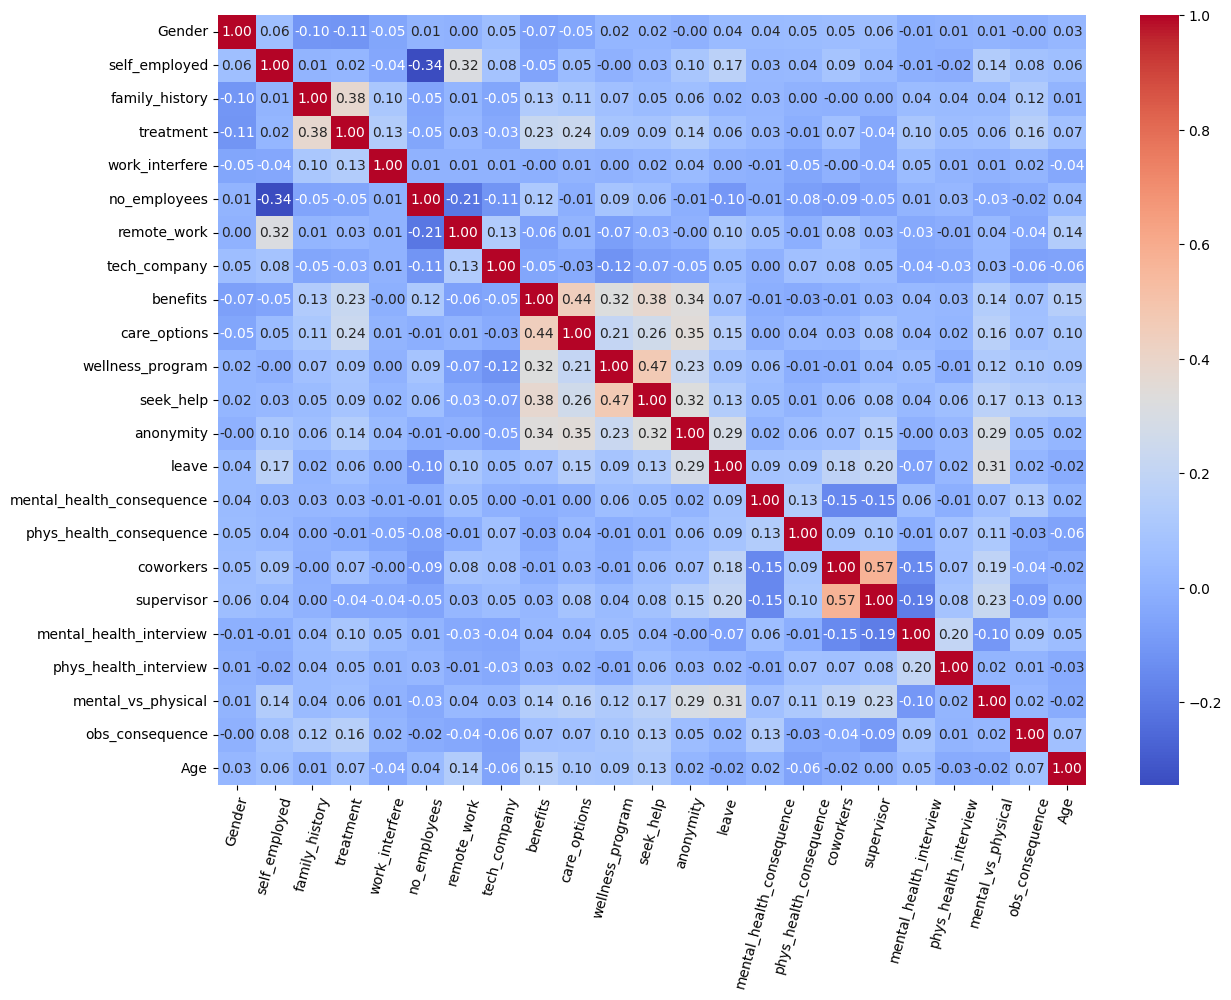

In [146]:
matrix=df_corr.corr()
plt.figure(figsize=(14,10))
sns.heatmap(matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.xticks(rotation=75)
plt.show()
